# Proceso creativo a partir de Graph Theory de Diestel

Libro escrito para:

- Presentar la teoría de grafos como una disciplina matemática moderna
- Cubrir tanto los fundamentos clásicos como los desarrollos recientes y avanzados
- Servor tanto como introducción como referencia para investigadores

## Capítulo 1: Conceptos básicos

1.1. Grafos: 
- Un grafo es un par de sets V,E
- Hablamos de un vértice de G como v ϵ G, y una arista de G como e ϵ G
- La cantidad de vértices es el orden del grafo |G|
- Grafo vacío Ø, grafo de orden 0 o 1 es trivial
- El set de todas las aristas en un vértice es denotado por E(v)
- Dos vértices x,y son adyacentes si xy es una arista de G
- Si todos los n vértices de G son adyacentes, G es completo K<sup>n</sup>, K<sup>3</sup> es un triángulo
- En la teoría de grafos existen las operaciones de conjuntos Unión, Resta e Intersección
- Si V' está contenido en V y E' en E, entonces G' es subgrafo de G
- Si el subgrafo G' preserva todas las conexiones posibles de G, G' es subgrafo inducido
- Si el subgrafo G' tiene todos los vértices de G, G' es subgrafo generador
- Si G' es subgrafo inducido y generador de G, G' es G
- Un grafo edge-maximal respecto a una propiedad, pierde esa propiedad si se le agrega una arista
- Un grafo edge-minimal respecto a una propiedad, pierde esa propiedad si se le quita una arista
- K<sup>2</sup> * K<sup>3</sup> = K<sup>5</sup>
- El complemento de G, G barra, tiene mismo V que G, pero con todas las conexiones que le faltan a G para ser completo (sin las conexiones de G)
- Cada nodo del grafo línea de G, L(G), representa una arista de G


### Librería NetworkX para trabajar con grafos

Nodos: ['A', 'B', 'C']
Aristas: [('A', 'B')]
Grado de cada nodo: {'A': 1, 'B': 1, 'C': 0}
Vecinos de A: ['B']


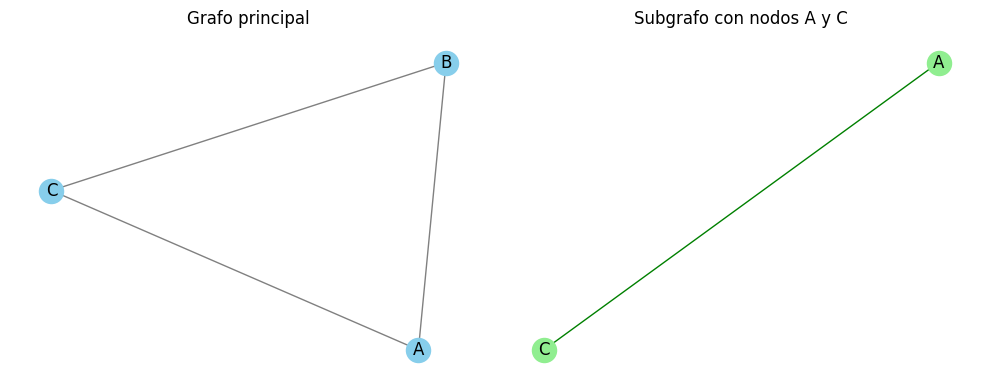

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Crear un grafo no dirigido
G = nx.Graph()

# 2. Agregar nodos
G.add_node("A")
G.add_nodes_from(["B", "C", "D"])

# 3. Agregar aristas
G.add_edge("A", "B")  # Una arista entre A y B
G.add_edges_from([("B", "C"), ("C", "D")])

# 4. Eliminar un nodo
G.remove_node("D")

# 5. Eliminar una arista
G.remove_edge("B", "C")

# 6. Consultar propiedades del grafo
print("Nodos:", G.nodes())
print("Aristas:", G.edges())
print("Grado de cada nodo:", dict(G.degree()))
print("Vecinos de A:", list(G.neighbors("A")))

# 7. Crear un subgrafo
# Agregamos más nodos para ilustrar el subgrafo
G.add_edges_from([("A", "C"), ("C", "B"), ("A", "B")])  # re-agregar aristas
nodos_subgrafo = ["A", "C"]
subG = G.subgraph(nodos_subgrafo)

# Dibujar el grafo principal
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Grafo principal")

# Dibujar el subgrafo
plt.subplot(1, 2, 2)
nx.draw(subG, with_labels=True, node_color='lightgreen', edge_color='green')
plt.title("Subgrafo con nodos A y C")

plt.tight_layout()
plt.show()


### Operaciones básicas entre 2 grafos usando NetworkX (1)

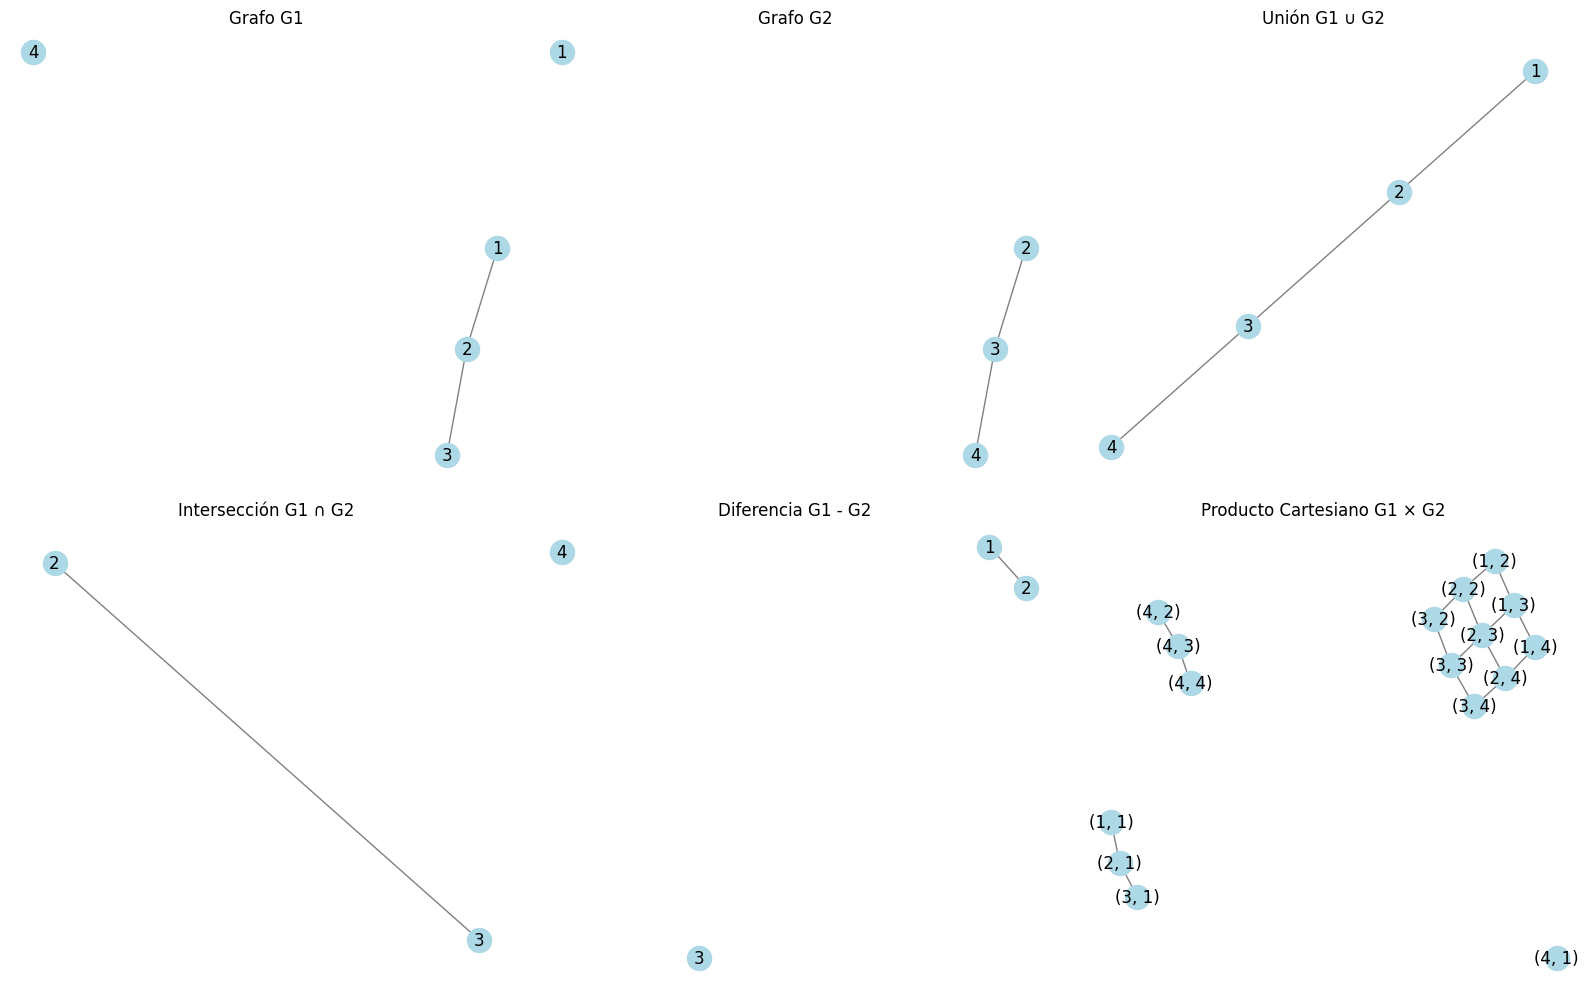

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear dos grafos simples
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3)])

G2 = nx.Graph()
G2.add_edges_from([(2, 3), (3, 4)])

# Unión de grafos
G_union = nx.compose(G1, G2)

# Intersección de grafos (requiere nodos y aristas exactamente iguales)
G_intersection = nx.intersection(G1, G2)

# Diferencia de grafos: G1 - G2 (nodos y aristas en G1 que no están en G2)

# Igualamos los nodos agregando los faltantes a cada grafo sin conectarlos
all_nodes = set(G1.nodes()) | set(G2.nodes())
G1.add_nodes_from(all_nodes - set(G1.nodes()))
G2.add_nodes_from(all_nodes - set(G2.nodes()))

G_difference = nx.difference(G1, G2)

# Producto cartesiano
G_cartesian = nx.cartesian_product(G1, G2)

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Función para dibujar
def draw_graph(ax, G, title, pos=None):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", ax=ax)
    ax.set_title(title)

draw_graph(axes[0, 0], G1, "Grafo G1")
draw_graph(axes[0, 1], G2, "Grafo G2")
draw_graph(axes[0, 2], G_union, "Unión G1 ∪ G2")
draw_graph(axes[1, 0], G_intersection, "Intersección G1 ∩ G2")
draw_graph(axes[1, 1], G_difference, "Diferencia G1 - G2")
draw_graph(axes[1, 2], G_cartesian, "Producto Cartesiano G1 × G2")

plt.tight_layout()
plt.show()


### Operaciones básicas entre 2 grafos usando NetworkX (2)